In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ffffffffffffffffff/WhatsApp Image 2025-06-07 at 19.03.39_45666725.jpg
/kaggle/input/kkkkkkkkkkkkkk/1000_F_254710222_3O9Lg0HVwbaBo6Pd6ssDs5Jy1n8NHtEA.jpg
/kaggle/input/acne-data/Acne/valid/labels/acne-face-7-1__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDE4XQ_jpg.rf.7e7bc65013203aff016d84bb25955e80.txt
/kaggle/input/acne-data/Acne/valid/labels/acne-face-55__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd_jpg.rf.03e0b5a7e0921d0d62d2e26acdbabace.txt
/kaggle/input/acne-data/Acne/valid/labels/acne-039-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd_JPG.rf.76907041f395955db4151d60a3bf9975.txt
/kaggle/input/acne-data/Acne/valid/labels/stock-photo-icepick-scars-acne-on-cheek-on-face-in-women-cause-of-happen-because-of-the-overlaying-skin-1378254479_jpg.rf.6c8068c4adbd646298e41afde6144a62.txt
/kaggle/input/acne-data/Acne/valid/labels/24_jpg.rf.0923621e81ed1f9ac283f7d6522ae2a7.txt
/kaggle/input/acne-data/Acne/valid/labels/set2-3-_jpg.rf.8cb79221849a63ed0c0eca8e5

In [2]:
!pip install ultralytics --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 11.2 MB/s eta 0:00:00:00:0100:01


In [3]:
from ultralytics import YOLO
import os
import shutil

# ================== 1. نقل البيانات ==================
source_dir = "/kaggle/input/acne-data/Acne"
target_dir = "/kaggle/working/Acne"
shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

# ================== 2. تعديل labels إلى class 0 ==================
for split in ["train", "valid", "test"]:
    labels_dir = os.path.join(target_dir, split, "labels")
    for filename in os.listdir(labels_dir):
        if filename.endswith(".txt"):
            path = os.path.join(labels_dir, filename)
            with open(path, "r") as f:
                lines = f.readlines()
            new_lines = ["0 " + " ".join(line.strip().split()[1:]) for line in lines]
            with open(path, "w") as f:
                f.write("\n".join(new_lines))

# ================== 3. إنشاء ملف data.yaml ==================
yaml_content = """
train: /kaggle/working/Acne/train/images
val: /kaggle/working/Acne/valid/images
test: /kaggle/working/Acne/test/images

nc: 1
names: ["Acne"]
"""
with open("data.yaml", "w") as f:
    f.write(yaml_content)

# ================== 4. تحميل YOLOv8m ==================
model = YOLO("yolov8m.pt")  # نسخة متوسطة مناسبة للداتا المحدودة

# ================== 5. التدريب مع fine-tuning وتحسينات ==================
model.train(
    data="data.yaml",
    epochs=70,
    imgsz=640,
    batch=16,
    name="acne_yolo_finetune",
    degrees=10,
    translate=0.2,
    scale=0.5,
    shear=1.5,
    flipud=0.4,
    fliplr=0.5,
    hsv_h=0.05,
    hsv_s=0.7,
    hsv_v=0.5,
    mosaic=0.8,
    mixup=0.2,
    close_mosaic=5,
    cos_lr=True,
    patience=15,
    cache=True,
    lr0=0.0005,
    lrf=0.01,
    warmup_epochs=2
)

# ================== 6. حفظ أفضل نسخة من النموذج ==================
best_model_path = "runs/detect/acne_yolo_finetune/weights/best.pt"
shutil.copy(best_model_path, "/kaggle/working/best_model.pt")

# ================== 7. التنبؤ على test images (TTA + threshold) ==================
model = YOLO("/kaggle/working/best_model.pt")
results = model.predict(
    source="/kaggle/working/Acne/test/images",
    conf=0.5,         # زيادة threshold يحسن الدقة
    augment=True,     # TTA: تحسين النتائج بالاختبار مع Augmentations
    save=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 155MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=5, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.4, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.05, hsv_s=0.7, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=acne_yolo_finetune, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 735.6±320.2 MB/s, size: 32.4 KB)


train: Scanning /kaggle/working/Acne/train/labels... 1676 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1676/1676 [00:01<00:00, 1390.15it/s]


train: New cache created: /kaggle/working/Acne/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 84, len(boxes) = 21658. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.9GB RAM): 100%|██████████| 1676/1676 [00:02<00:00, 783.05it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 466.2±150.7 MB/s, size: 33.1 KB)


val: Scanning /kaggle/working/Acne/valid/labels... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<00:00, 1318.34it/s]

val: New cache created: /kaggle/working/Acne/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 351/351 [00:00<00:00, 459.78it/s]


Plotting labels to runs/detect/acne_yolo_finetune/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/acne_yolo_finetune
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70       6.7G      2.877      2.914      1.966        258        640: 100%|██████████| 105/105 [00:53<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        351       3491   0.000743     0.0215    0.00038   0.000124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      7.02G      2.833      2.757       1.91        161        640: 100%|██████████| 105/105 [00:53<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        351       3491     0.0593      0.143     0.0253    0.00796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      7.59G      2.787       2.76      1.871        191        640: 100%|██████████| 105/105 [00:56<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        351       3491      0.153      0.216     0.0861     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      6.72G      2.732      2.685      1.818        340        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        351       3491       0.21      0.223      0.112     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      6.79G      2.728      2.667      1.814        175        640: 100%|██████████| 105/105 [00:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        351       3491      0.167      0.244     0.0976     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      6.85G      2.679       2.61      1.758        216        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        351       3491      0.131      0.233     0.0754     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      7.22G      2.663      2.581      1.739        120        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        351       3491       0.15      0.219     0.0807     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      7.29G      2.652      2.574      1.752        272        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        351       3491      0.155      0.244      0.092     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      7.77G      2.639      2.575      1.745        262        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        351       3491      0.165      0.245      0.103     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      6.85G      2.644      2.556      1.737        290        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        351       3491      0.175      0.258      0.106      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      6.85G      2.625      2.548       1.72        244        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        351       3491        0.2       0.27      0.132     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      7.16G      2.632      2.551      1.721        340        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        351       3491      0.171      0.265      0.106     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70       7.2G      2.596      2.542      1.708        271        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        351       3491      0.159      0.231     0.0877     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      7.27G      2.608      2.532      1.705        193        640: 100%|██████████| 105/105 [00:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.144      0.248     0.0829     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      7.65G       2.57      2.482      1.704        261        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        351       3491      0.197      0.278      0.124     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      6.94G      2.579      2.475      1.692        249        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        351       3491      0.176      0.231      0.102     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      6.94G      2.593      2.491      1.685        240        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        351       3491      0.206      0.275      0.132     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      7.28G      2.575      2.449      1.661        156        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        351       3491      0.181      0.282       0.12     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      7.32G      2.577       2.45      1.681        143        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        351       3491      0.158      0.252     0.0958     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      7.39G       2.56      2.431      1.666        270        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        351       3491      0.244        0.3       0.17     0.0535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      7.11G      2.553      2.429      1.678        180        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        351       3491       0.21        0.3      0.144     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      7.11G       2.54       2.43      1.665        231        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.172      0.284      0.119     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      7.11G      2.532      2.423      1.654        139        640: 100%|██████████| 105/105 [00:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        351       3491      0.233      0.269      0.148     0.0462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      7.17G      2.558      2.403       1.64        338        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        351       3491       0.23      0.288      0.156     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      7.24G      2.521      2.411      1.655        256        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        351       3491      0.156      0.281      0.107     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      7.31G      2.554      2.406      1.652        159        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        351       3491      0.204       0.28      0.134     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      7.67G      2.522      2.392      1.636        149        640: 100%|██████████| 105/105 [00:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        351       3491      0.189       0.27      0.124     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      6.96G      2.519      2.409      1.641        116        640: 100%|██████████| 105/105 [00:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.168      0.247      0.107     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      6.96G      2.527      2.394      1.642        112        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.228      0.266      0.137     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      6.96G      2.488      2.371      1.632        148        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.236      0.293      0.159     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      7.27G      2.525      2.371      1.635         99        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        351       3491      0.249      0.303      0.176     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      7.73G      2.504      2.339      1.646        203        640: 100%|██████████| 105/105 [00:56<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        351       3491      0.232      0.295      0.155     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      6.88G      2.514      2.367       1.63        321        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        351       3491      0.219      0.278      0.146     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      7.34G      2.508       2.35      1.623        299        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.247      0.313       0.17      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      7.34G      2.508      2.329      1.616        309        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        351       3491      0.226      0.304      0.159     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70       7.4G      2.467      2.309      1.616        154        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        351       3491      0.263      0.332      0.189     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      6.59G       2.48      2.329       1.61        222        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.246      0.304      0.175     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70       6.9G      2.493       2.34      1.621        162        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        351       3491      0.239      0.333       0.18     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      7.36G      2.472      2.316      1.594        214        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.226      0.293       0.16     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      6.74G       2.48      2.318      1.612        440        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        351       3491      0.254      0.282       0.17     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      7.31G      2.474      2.321      1.621        179        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.224      0.286      0.154     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      6.72G      2.456      2.305      1.608        150        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        351       3491      0.258       0.33      0.184     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      7.54G      2.464      2.299      1.608        198        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.255      0.318      0.182      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      6.85G      2.462      2.309      1.601        111        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        351       3491      0.271       0.31      0.193     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      7.31G      2.443      2.292      1.615        127        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.242      0.309      0.173     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      7.38G      2.458      2.304      1.609        351        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        351       3491      0.258      0.309      0.183     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      6.83G      2.449       2.26       1.58        180        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        351       3491      0.258      0.329      0.193      0.061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      7.32G      2.453      2.253      1.584        248        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        351       3491      0.268      0.359      0.206     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      7.38G      2.462      2.256      1.585        287        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.251      0.315      0.182     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70       6.6G      2.437      2.276        1.6        239        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        351       3491      0.254      0.313      0.191     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      6.93G      2.406       2.27      1.599        232        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        351       3491      0.263      0.321      0.194     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70         7G      2.424      2.259      1.592        181        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491       0.27       0.32      0.205     0.0689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      7.06G      2.428      2.219       1.56        334        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        351       3491      0.275      0.309      0.203     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      7.13G      2.435       2.23      1.573        204        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        351       3491      0.278      0.342      0.208     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      7.62G      2.423      2.223      1.569        137        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.275      0.344      0.213     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      7.07G      2.425      2.225      1.558        233        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491       0.29       0.33       0.21     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      7.07G      2.418      2.235      1.568        210        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        351       3491      0.286      0.335      0.208     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      7.07G      2.419      2.214      1.571        172        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.293      0.338      0.216     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      7.09G      2.413      2.227      1.583        244        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        351       3491      0.285      0.333       0.21     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      7.58G      2.407      2.205      1.567        189        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.285       0.34       0.22     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      7.03G      2.419      2.198      1.559        233        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        351       3491      0.282      0.341      0.213      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      7.03G      2.404      2.186      1.562        206        640: 100%|██████████| 105/105 [00:56<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        351       3491      0.283      0.334      0.216       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      7.51G      2.398      2.197      1.559        125        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        351       3491      0.288      0.345      0.224     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      6.99G      2.414      2.205      1.566        190        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.285      0.342       0.22     0.0729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70         7G      2.381       2.21      1.573        171        640: 100%|██████████| 105/105 [00:55<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        351       3491      0.279      0.337      0.212     0.0706


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      7.07G       2.33      2.145      1.564         61        640: 100%|██████████| 105/105 [00:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        351       3491      0.287      0.336      0.216     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      7.13G      2.324      2.108      1.549        192        640: 100%|██████████| 105/105 [00:55<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        351       3491      0.291      0.344      0.224      0.073



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70       7.2G      2.328      2.108      1.567        116        640: 100%|██████████| 105/105 [00:55<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.299      0.348       0.23     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      7.27G      2.325      2.105      1.557        165        640: 100%|██████████| 105/105 [00:55<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.297      0.344      0.225     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      7.33G      2.335      2.109      1.561         77        640: 100%|██████████| 105/105 [00:55<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        351       3491      0.299      0.346      0.229     0.0761



70 epochs completed in 1.209 hours.
Optimizer stripped from runs/detect/acne_yolo_finetune/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/acne_yolo_finetune/weights/best.pt, 52.0MB

Validating runs/detect/acne_yolo_finetune/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        351       3491      0.295      0.351       0.23     0.0764
Speed: 0.2ms preprocess, 10.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/acne_yolo_finetune

image 1/151 /kaggle/working/Acne/test/images/-_jpg.rf.032bbb2ccc7ae8986e5391ac33c238b8.jpg: 640x640 (no detections), 105.2ms
image 2/151 /kaggle/working/Acne/test/images/-_jpg.rf.50da95dc36d6faeba3e3f393c7917b8c.jpg: 640x640 (no detections), 53.5ms
image 3/151 /kaggle/working/Acne/test/images/-_jpg.rf.92fd39b61d1ee8e755d6da7e871735a9.jpg: 640x640 (no detections), 55.9ms
image 4/151 /kaggle/working/Acne/test/images/-_jpg.rf.f9f867d2a739eb8671e7370173d7399e.jpg: 640x640 (no detections), 56.2ms
image 5/151 /kaggle/working/Acne/test/images/100_jpg.rf.2e531d03f100e4cabc95d2ca2739afdb.jpg: 640x640 (no detections), 56.9ms
image 6/151 /kaggle/working/Acne/test/images/102_jpg.rf.4ea9036f32c4aeeafe946dd01704cca1.jpg: 640x640 (no detections), 56.4ms
image 7/151 /kaggle/working/Ac


image 1/1 /kaggle/input/lllllllllllll/download.jpeg: 448x640 70 Acnes, 42.4ms
Speed: 1.8ms preprocess, 42.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict7


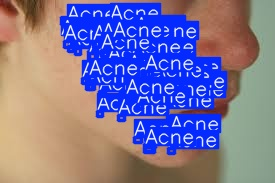

In [15]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# تحميل أفضل نموذج تم تدريبه
model = YOLO("/kaggle/working/best_model.pt")

# التنبؤ على صورة اختبار
results = model.predict(
    source="/kaggle/input/lllllllllllll/download.jpeg",
    conf=0.1,
    iou=0.5,
    save=True,
    show_conf=False,     # إخفاء النسبة المئوية
    show_labels=True     # عرض اسم الكلاس "Acne" (غيّره لـ False لو مش عايزه يظهر)
)

# عرض النتيجة
output_dir = results[0].save_dir
image_files = [f for f in os.listdir(output_dir) if f.endswith((".jpg", ".jpeg", ".png"))]

if image_files:
    display(Image(filename=os.path.join(output_dir, image_files[0])))
else:
    print("❌ لم يتم العثور على صورة ناتجة.")


In [11]:
from ultralytics import YOLO

# تحميل أفضل نموذج
model = YOLO("/kaggle/working/best_model.pt")  # أو أي مسار لنموذجك

# تقييم النموذج على مجموعة الـ validation أو test
metrics = model.val(
    data="data.yaml",    # نفس ملف الداتا المستخدم في التدريب
    split="test",        # أو "val" لو عايز تستخدم مجموعة التحقق
    iou=0.5,
    conf=0.25,
    plots=True           # يرسم لك confusion matrix ونتائج إضافية
)

# طباعة النتائج
print(metrics.results_dict)


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 915.6±209.4 MB/s, size: 38.7 KB)


val: Scanning /kaggle/working/Acne/test/labels... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<00:00, 1295.37it/s]

val: New cache created: /kaggle/working/Acne/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        151       2668      0.597     0.0933      0.333      0.116
Speed: 2.1ms preprocess, 22.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
{'metrics/precision(B)': 0.5971223021582733, 'metrics/recall(B)': 0.09332833583208396, 'metrics/mAP50(B)': 0.3334759672504464, 'metrics/mAP50-95(B)': 0.11564626068173293, 'fitness': 0.1374292313386043}


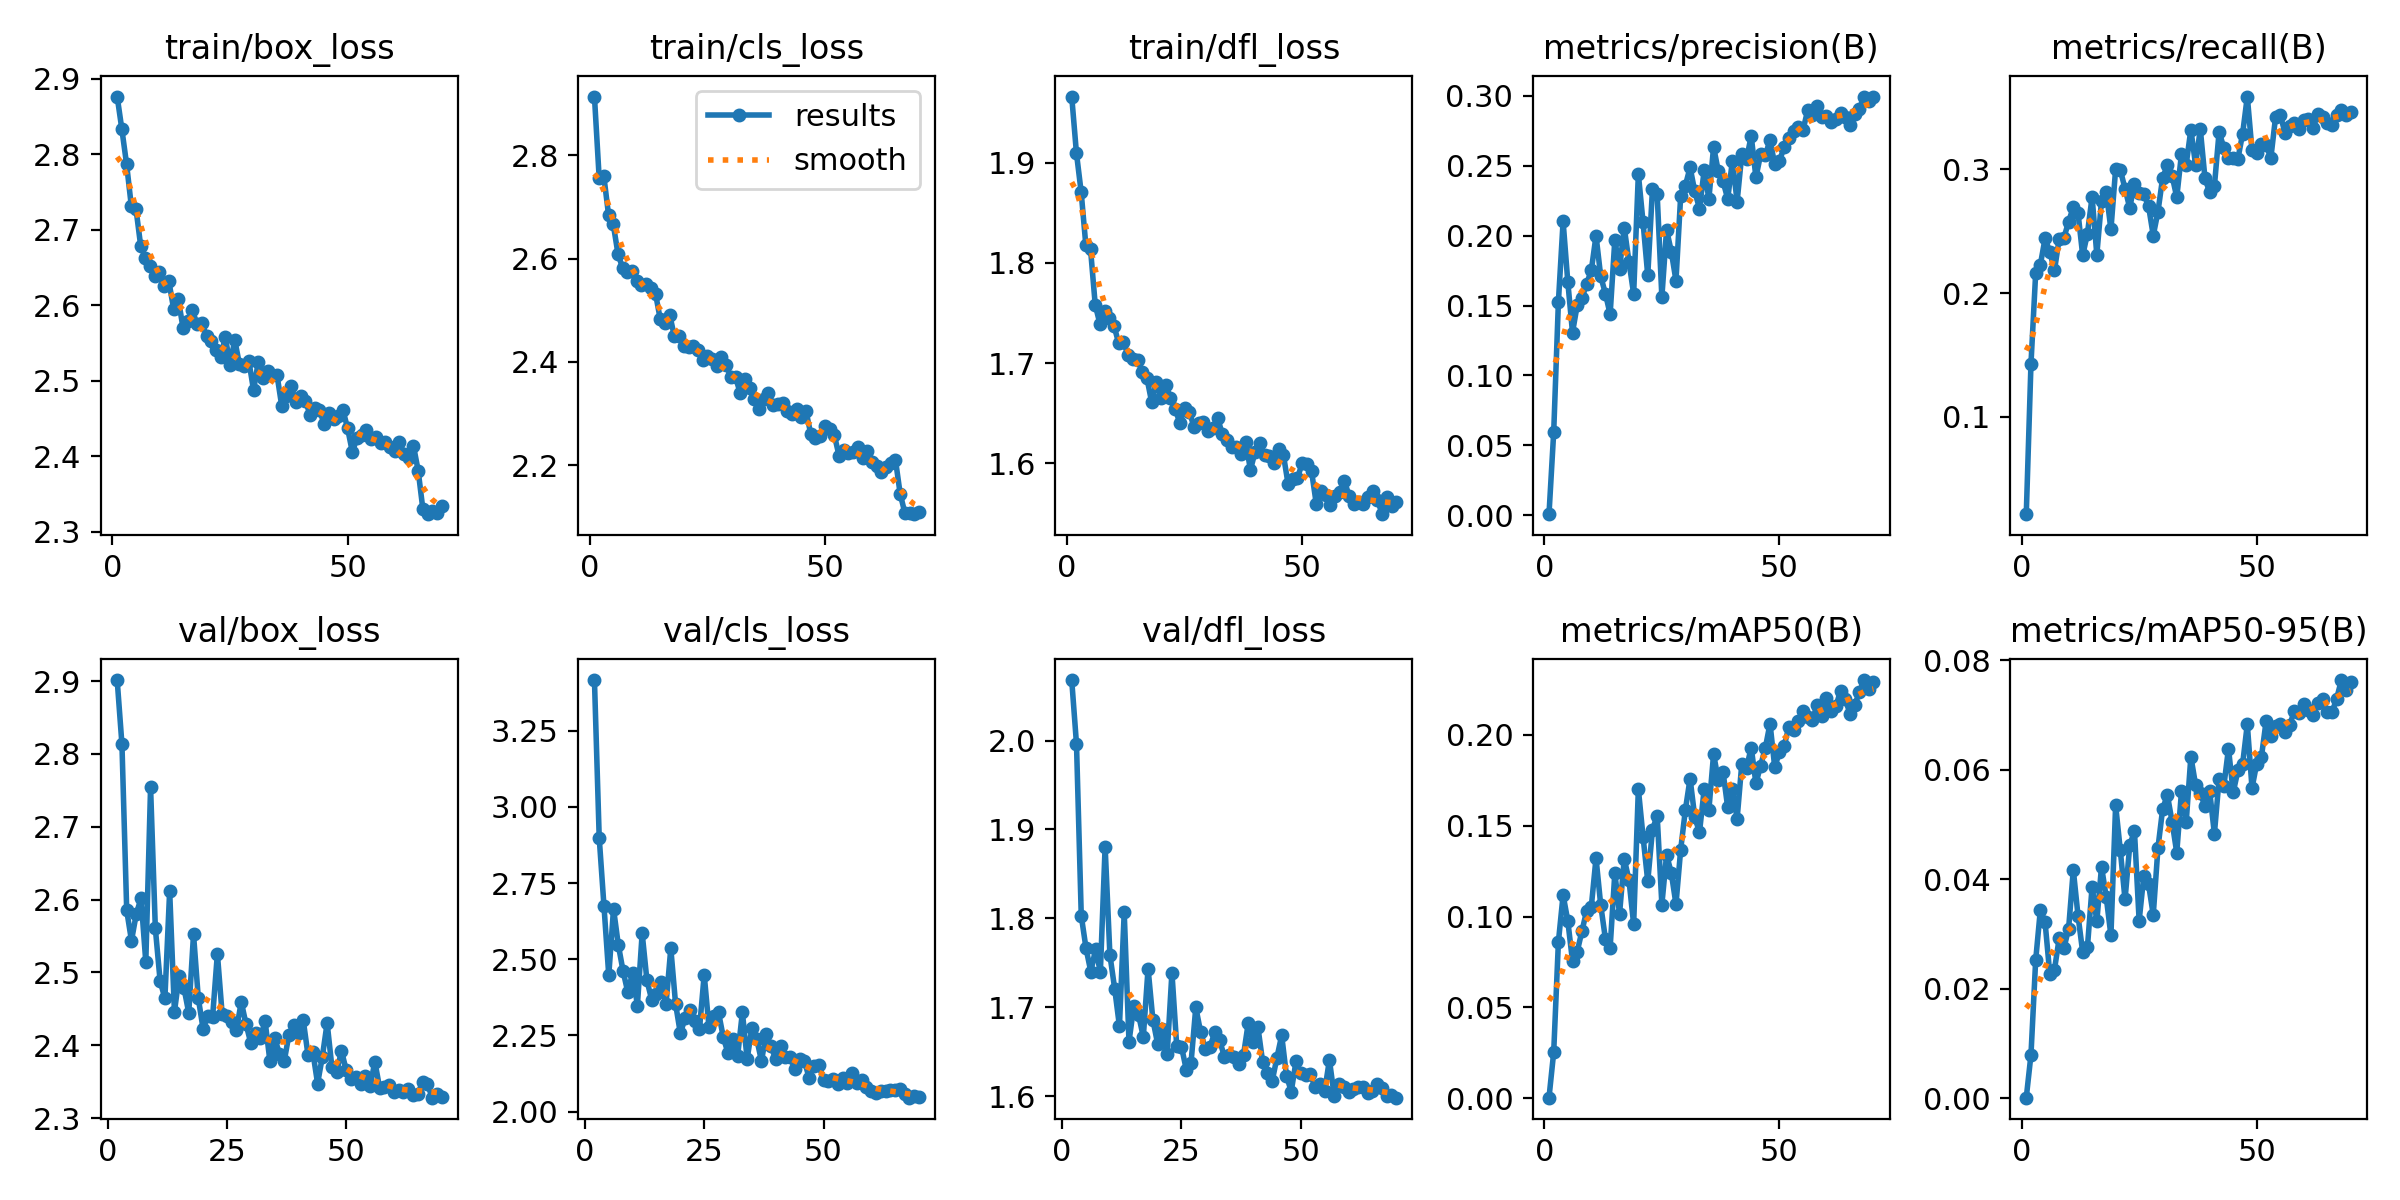

In [12]:
from IPython.display import Image, display

# Displaying the training and evaluation curves
results_path = "/kaggle/working/runs/detect/acne_yolo_finetune/results.png"
display(Image(filename=results_path))


0: 640x640 (no detections), 20.8ms
1: 640x640 2 Acnes, 20.8ms
2: 640x640 4 Acnes, 20.8ms
3: 640x640 13 Acnes, 20.8ms
4: 640x640 4 Acnes, 20.8ms
5: 640x640 (no detections), 20.8ms
6: 640x640 4 Acnes, 20.8ms
7: 640x640 (no detections), 20.8ms
8: 640x640 1 Acne, 20.8ms
9: 640x640 1 Acne, 20.8ms
10: 640x640 (no detections), 20.8ms
11: 640x640 4 Acnes, 20.8ms
12: 640x640 (no detections), 20.8ms
13: 640x640 5 Acnes, 20.8ms
14: 640x640 4 Acnes, 20.8ms
15: 640x640 1 Acne, 20.8ms
16: 640x640 (no detections), 20.8ms
17: 640x640 (no detections), 20.8ms
18: 640x640 (no detections), 20.8ms
19: 640x640 1 Acne, 20.8ms
20: 640x640 1 Acne, 20.8ms
21: 640x640 (no detections), 20.8ms
22: 640x640 1 Acne, 20.8ms
23: 640x640 2 Acnes, 20.8ms
24: 640x640 1 Acne, 20.8ms
25: 640x640 1 Acne, 20.8ms
26: 640x640 2 Acnes, 20.8ms
27: 640x640 (no detections), 20.8ms
28: 640x640 (no detections), 20.8ms
29: 640x640 (no detections), 20.8ms
30: 640x640 1 Acne, 20.8ms
31: 640x640 (no detections), 20.8ms
32: 640x640 16 Ac

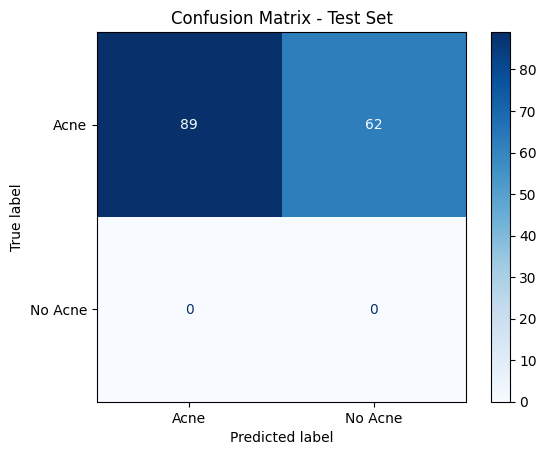

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ استخراج القيم الحقيقية (Ground Truth) من ملفات تصنيفات test
labels_dir = Path("/kaggle/working/Acne/test/labels")
image_files = list(Path("/kaggle/working/Acne/test/images").glob("*.jpg"))

y_true = []
for image_file in image_files:
    label_file = labels_dir / (image_file.stem + ".txt")
    if label_file.exists():
        with open(label_file, "r") as f:
            lines = f.readlines()
        # إذا كان هناك كائن class 0 → اعتبرها موجبة (positive)
        y_true.append(1 if any(line.strip().startswith("0 ") for line in lines) else 0)
    else:
        y_true.append(0)

# 2️⃣ استخراج القيم المتوقعة (Predicted Labels) من نموذج YOLO
results = model([str(p) for p in image_files])  # تأكدي من تمرير قائمة الصور كنصوص

# تحقق من عدد النتائج
if len(results) != len(image_files):
    raise ValueError(f"Mismatch: {len(image_files)} images vs {len(results)} YOLO results")

y_pred = []
for r in results:
    boxes = r.boxes
    pred_classes = boxes.cls.cpu().numpy() if boxes is not None else []
    y_pred.append(1 if 0 in pred_classes else 0)

# 3️⃣ حساب مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Acne", "No Acne"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()